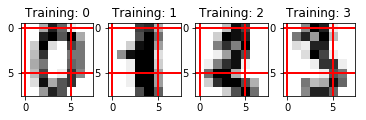

In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import pandas as pd
import numpy as np

# The digits dataset
digits = datasets.load_digits()

# for key,value in digits.items() :
#     try:
#         print (key,value.shape)
#     except:
#         print (key)

#
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('on')
    plt.grid(color='r', linestyle='-', linewidth=2)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_samples, -1))

# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])

expected = digits.target[int(n_samples / 2):]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[int(n_samples / 2):])